In [1]:
#!pip install Keras
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras import models 
import keras
from scipy.signal import blackman
from ast import literal_eval
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
!pip install import-ipynb
import import_ipynb

In [4]:
from create_model import CreateModel

importing Jupyter notebook from create_model.ipynb


# Vector representation of v2 

# Bidirectional model

# Kmeans algorithm

## Dataset

In [5]:
url = 'data/'
url_image='image_data/'

In [6]:
# # Reading a csv file named df_node_kmeans_algorithms
df_data = pd.read_csv(url+'df_node_kmeans_algorithms.csv',converters={'tf-idf': eval,'tf-idf_after_norm':eval}) 
df_data.shape

(514, 7)

In [7]:
df_data.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  
0             109.704459                0  
1             107.480757                0  
2             104.355574                0  
3              90.295322                0  
4              94.068587                0

In [8]:
df_data['kmeans_clusters'].value_counts()

0    409
4     95
2      5
3      4
1      1
Name: kmeans_clusters, dtype: int64

In [9]:
# Create object of class CreateModel
model_obj=CreateModel()

In [10]:
# Get 10 words with the highest text rank
word_list=model_obj.words_highest_text_rank(df_data)
word_list

['tel_aviv',
 'design',
 'works',
 'develop',
 'product',
 'engineer',
 'technologies',
 'skills',
 'look',
 'team',
 'company']

In [11]:
number_kmeans_clusters = len(set(df_data.kmeans_clusters))
print( 'Number of clusters for model input: ',number_kmeans_clusters)

Number of clusters for model input:  5


In [12]:
# Calculate an average vector for each cluster
dict_data=model_obj.average_vectors(df_data,number_kmeans_clusters, 'kmeans_clusters')
# Rename column
df_vectors_clusters=pd.DataFrame.from_dict([dict_data]).T.rename(columns = {0: 'dataset_clasters'}, inplace = False)
df_vectors_clusters

dataset_clasters
cluster 0  [13.568863524021507, 14.428040848532303, 11.91...
cluster 1  [0.3018288257225134, 0.0, 0.2829645241148563, ...
cluster 2  [0.3297103559914386, 0.34316792154210957, 0.65...
cluster 3  [0.0757514757929913, 0.09275690913427505, 0.30...
cluster 4  [2.448640626257563, 4.289485673395798, 3.94085...

In [13]:
# Enter the dataset_clasters values into the dataset
dataset = np.array(df_vectors_clusters['dataset_clasters'].to_list())
dataset.shape

(5, 699)

In [14]:
# Choose a number of time steps
n_steps = 50
# Call to function flat_split_sequences_validation
X_train, y_train, X_test, y_test, X_valid, y_valid = model_obj.flat_split_sequences_validation(dataset, n_steps)

In [15]:
y_train_lenght, y_valid_lenght, y_test_lenght= model_obj.get_lenght(X_train, X_valid, y_test)

y_train lenght : 389 , y_valid lenght : 129 , y_test lenght : 131


In [16]:
# Convert into input/output- Call to function reshape_data
X_train, y_train, X_test, y_test, X_valid, y_valid=model_obj.reshape_data(X_train, y_train, X_test, y_test, X_valid, y_valid, n_steps)
n_features = X_train.shape[2]
n_features

1

In [17]:
# Get predictive input data
full_X_train, full_y_train, full_X_test, full_y_test, full_X_valid, full_y_valid=model_obj.get_data_predict( df_data, n_steps)

# log-cosh

In [78]:
name_model='model_bidirectional_cluster/LogCosh_bidirectional_kmeans_cluster_v2_model'
name_history='history_bidirectional_cluster/LogCosh_bidirectional_kmeans_cluster_v2_history'

In [79]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.LogCosh())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [80]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


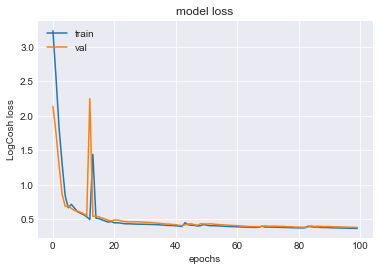

In [81]:
model_obj.model_loss(load_history,'LogCosh')

In [22]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [23]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 8s 4ms/step - loss: 0.0061


0.006070935167372227

In [24]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.10152587], [0.09183732], [0.08799435], [0....   
1  [[0.14158483], [0.12734339], [0.10953176], [0....   
2  [[0.026073288], [0.025784273], [0.025880042], ...   
3  [[0.06544237], [0.061711352], [0.05893718], [0...   
4  [[0.02479517], [0.025309298], [0.02615768], [0...   

                                     test_prediction  
0  [[0.021854859], [0.022361886], [0.023095597], ...  
1  [[0.049874242], [0.07003856], [0.09040028], [0...  
2  [[0.029196966], [0.026453692], [0.024179537], ...  
3  [[0.027885009], [0.06709033], [0.058221083], [...  
4  [[0.048275944], [0.0428554], [0.03813232], [0....

### Visualization of words prediction - logcosh loss

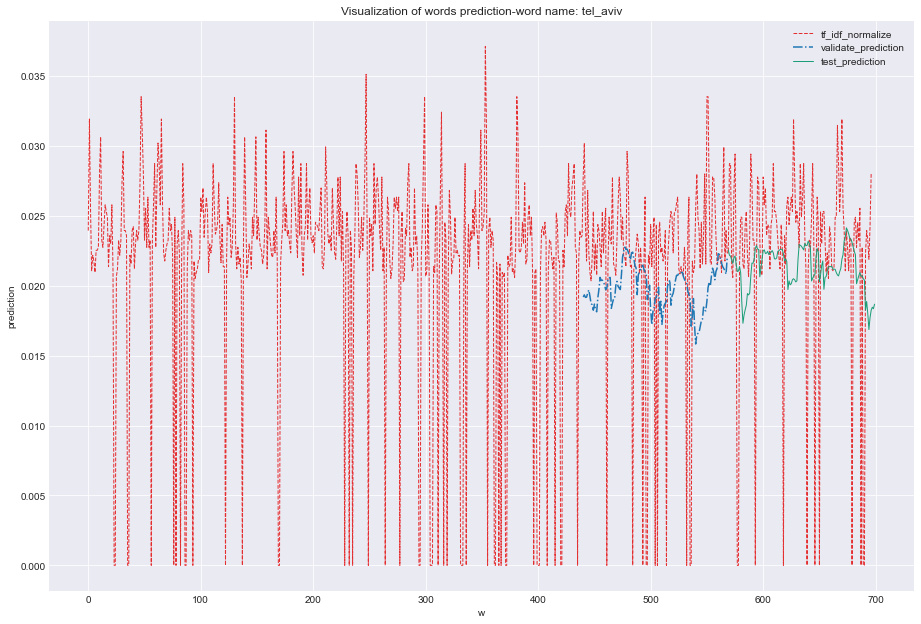

In [25]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

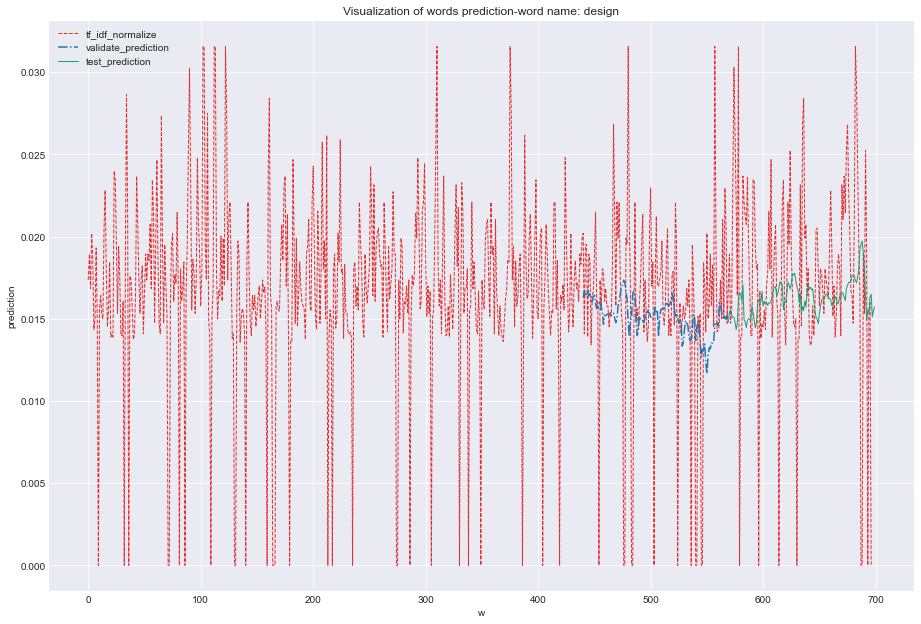

In [26]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

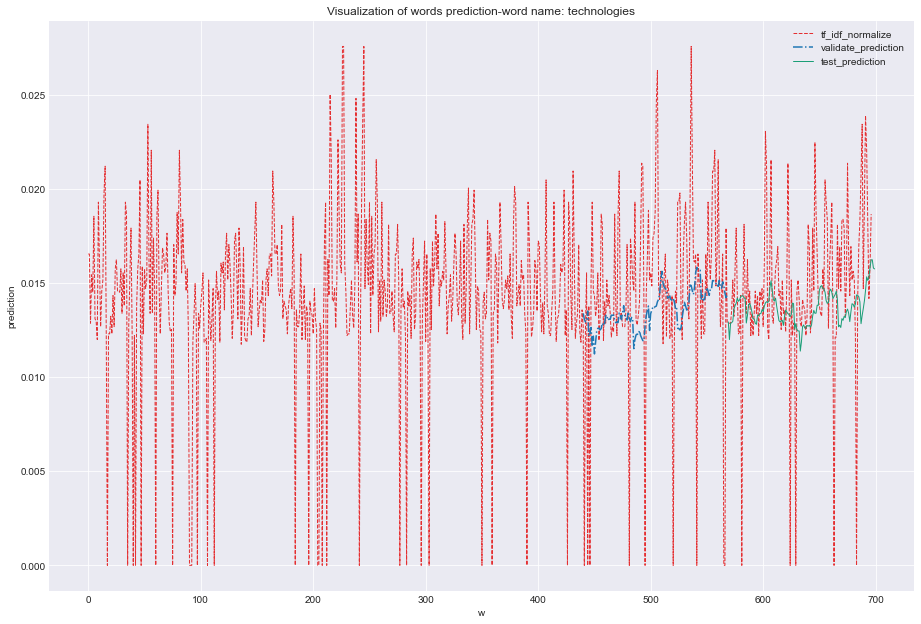

In [27]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

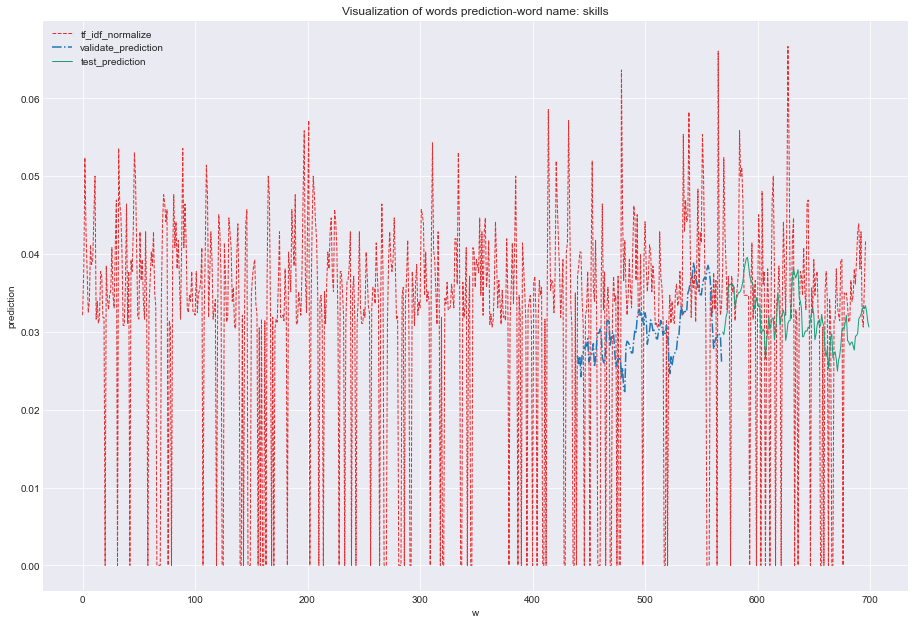

In [28]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

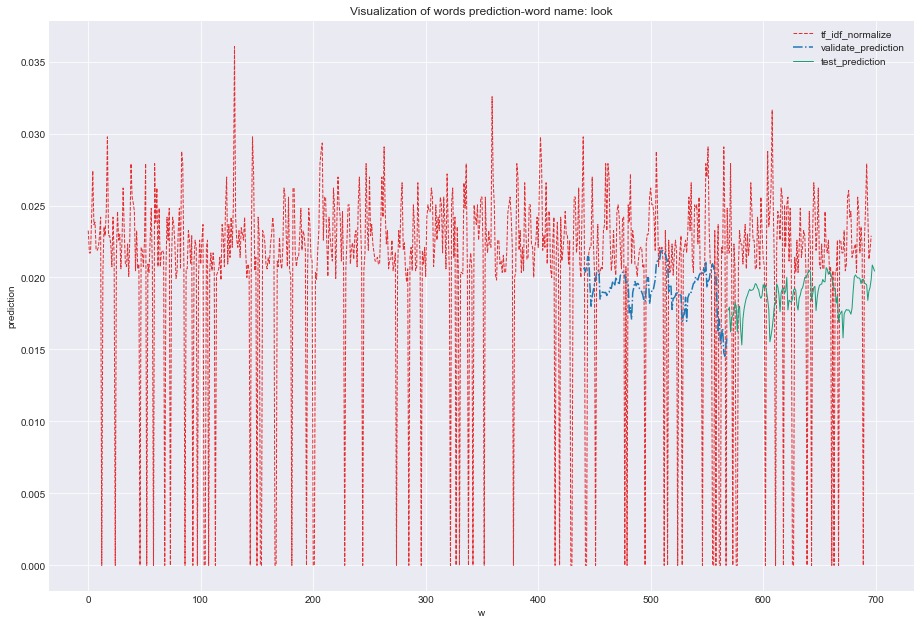

In [29]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

# Huber

In [30]:
name_model='model_bidirectional_cluster/Huber_bidirectional_kmeans_cluster_v2_model'
name_history='history_bidirectional_cluster/Huber_bidirectional_kmeans_cluster_v2_history'

In [31]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps,tf.keras.losses.Huber())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [32]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


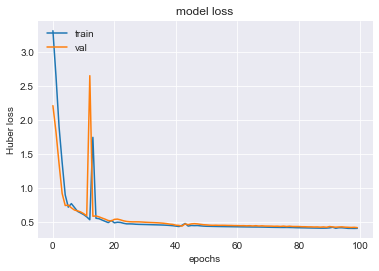

In [33]:
model_obj.model_loss(load_history,'Huber')

In [34]:
# Get a test and valid prediction for a Huber loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [35]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 9s 4ms/step - loss: 0.0061


0.006084210705012083

In [36]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.09306072], [0.08530563], [0.08335017], [0....   
1  [[0.1295297], [0.11687949], [0.10089892], [0.0...   
2  [[0.03330105], [0.034169916], [0.035296377], [...   
3  [[0.060156535], [0.058312807], [0.057407092], ...   
4  [[0.03466958], [0.03593899], [0.037405882], [0...   

                                     test_prediction  
0  [[0.031732325], [0.032652598], [0.033668865], ...  
1  [[0.051478576], [0.06548484], [0.07941483], [0...  
2  [[0.030101914], [0.02878495], [0.027824383], [...  
3  [[0.03932285], [0.06848493], [0.06062765], [0....  
4  [[0.039129753], [0.03581993], [0.033181917], [...

### Visualization of words prediction - Huber loss

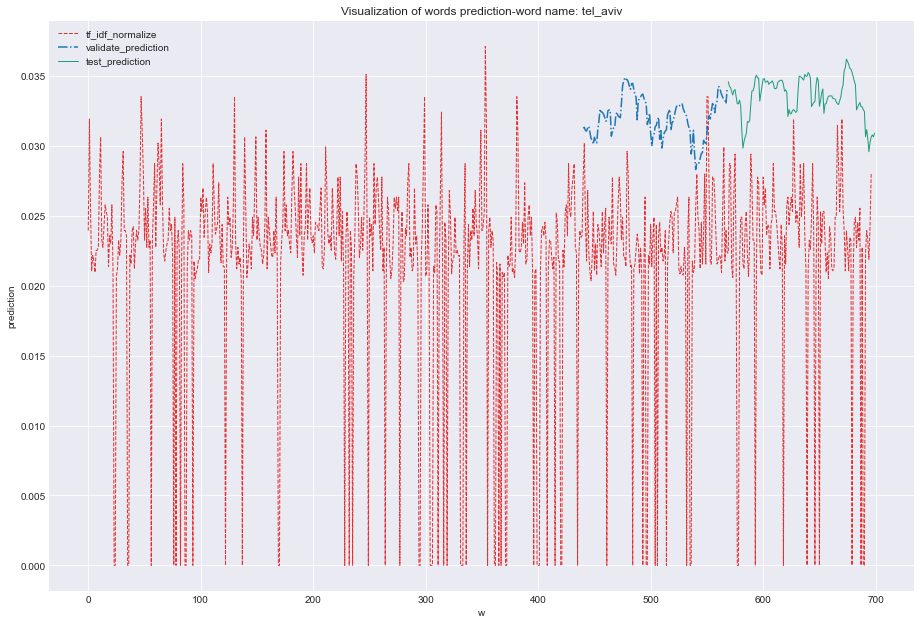

In [37]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

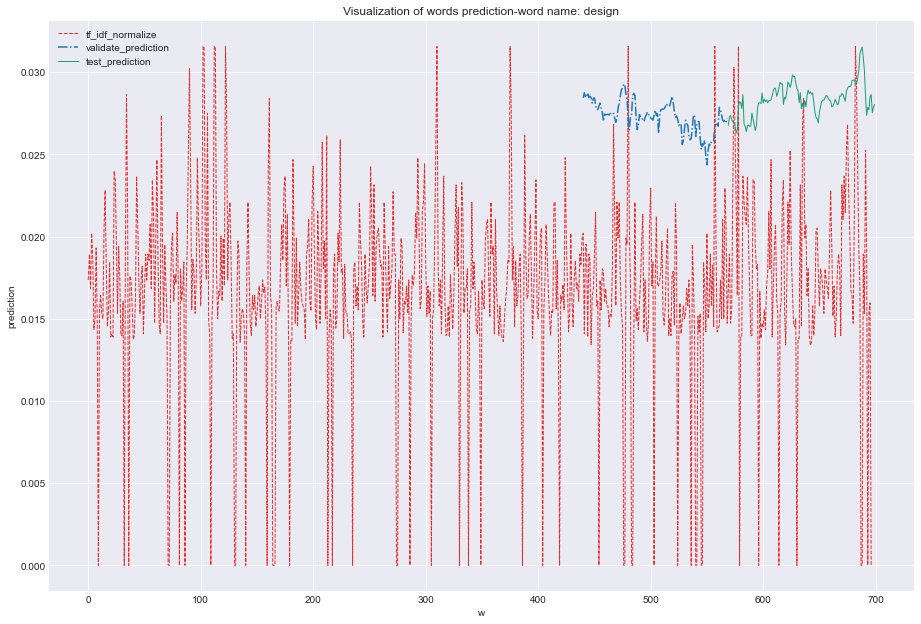

In [38]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

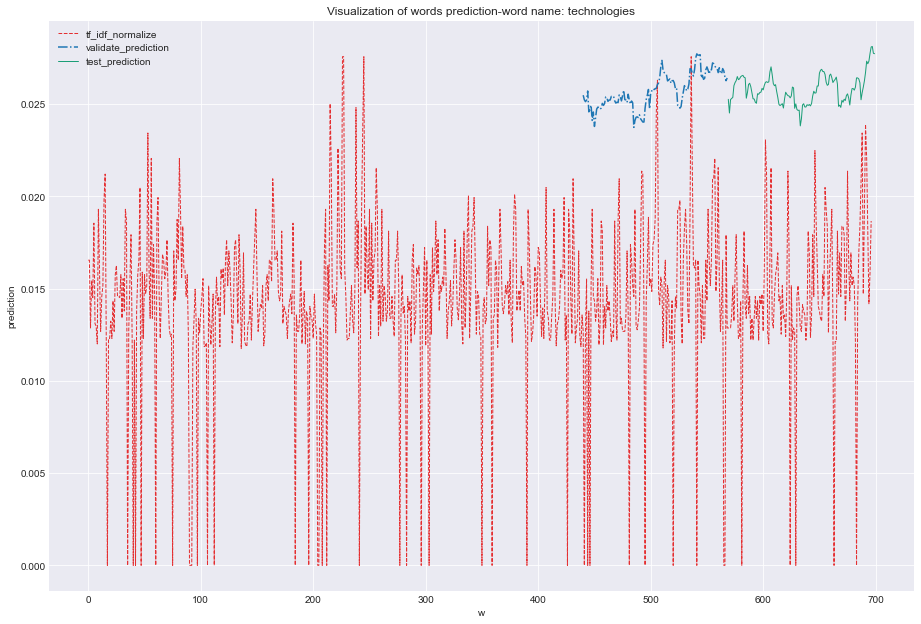

In [39]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

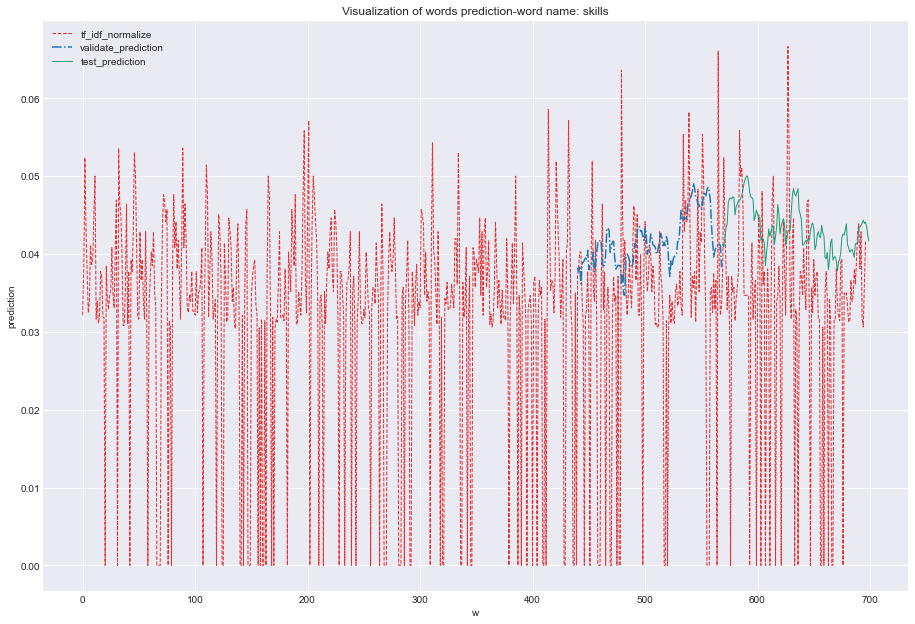

In [40]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

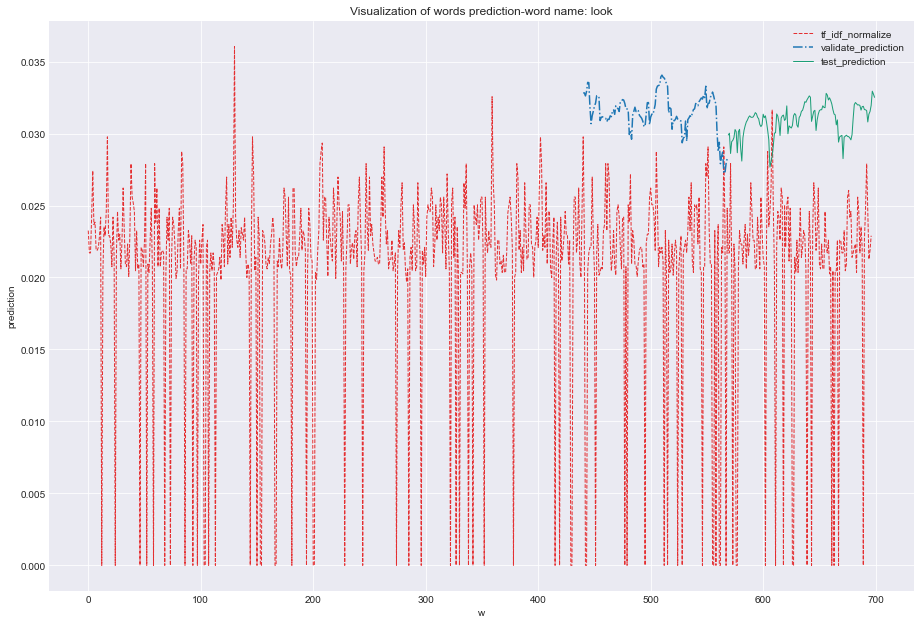

In [41]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## Logarithmic

In [42]:
name_model='model_bidirectional_cluster/Logarithmic_bidirectional_kmeans_cluster_v2_model'
name_history='history_bidirectional_cluster/Logarithmic_bidirectional_kmeans_cluster_v2_history'

In [43]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanSquaredLogarithmicError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [44]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


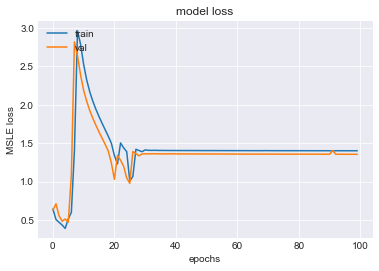

In [45]:
model_obj.model_loss(load_history,'MSLE')

In [46]:
# Get a test and valid prediction for a MSLE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [47]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 10s 4ms/step - loss: 0.0092


0.009198841638863087

In [48]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.10387561], [0.08272277], [0.076668575], [0...   
1  [[0.10802597], [0.10010958], [0.090087086], [0...   
2  [[0.03921397], [0.03725098], [0.035502583], [0...   
3  [[0.06830783], [0.063936904], [0.060469806], [...   
4  [[0.028158084], [0.026860684], [0.02571109], [...   

                                     test_prediction  
0  [[0.02688998], [0.026054814], [0.025424823], [...  
1  [[0.05634898], [0.07072413], [0.08736764], [0....  
2  [[0.03981158], [0.03769517], [0.0357832], [0.0...  
3  [[0.024403408], [0.0717679], [0.04740104], [0....  
4  [[0.058029696], [0.054540485], [0.05149004], [...

### Visualization of words prediction - MSLE  loss

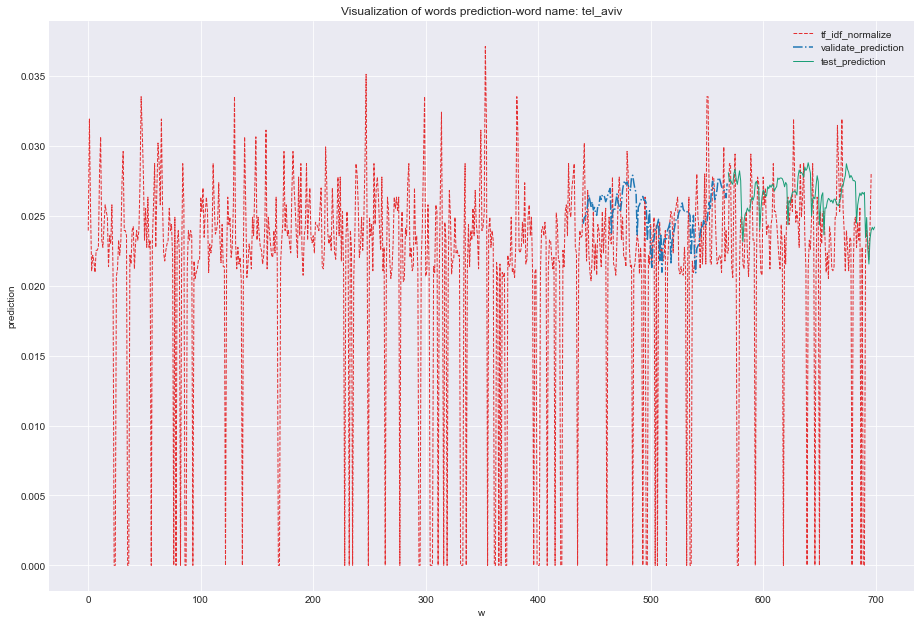

In [49]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

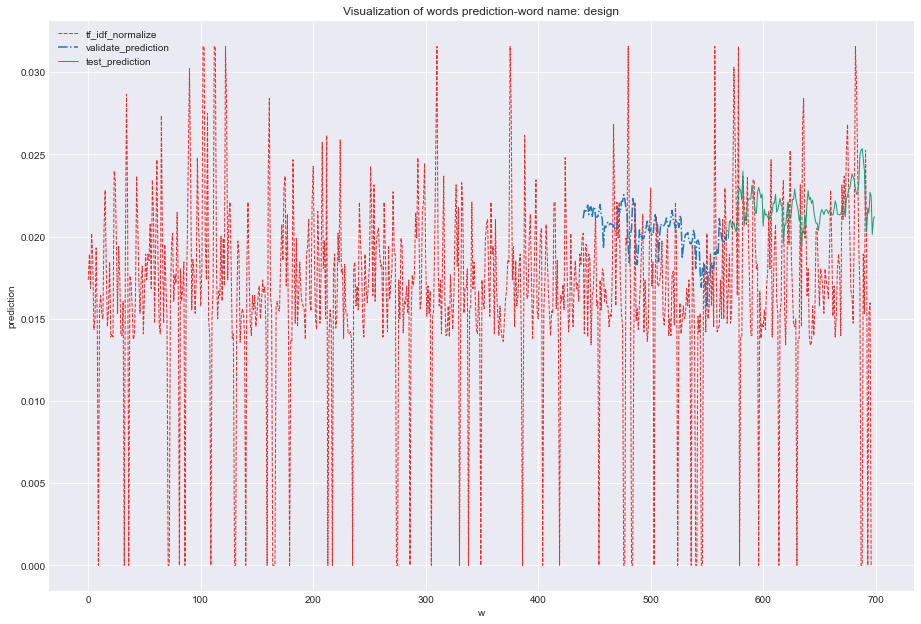

In [50]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

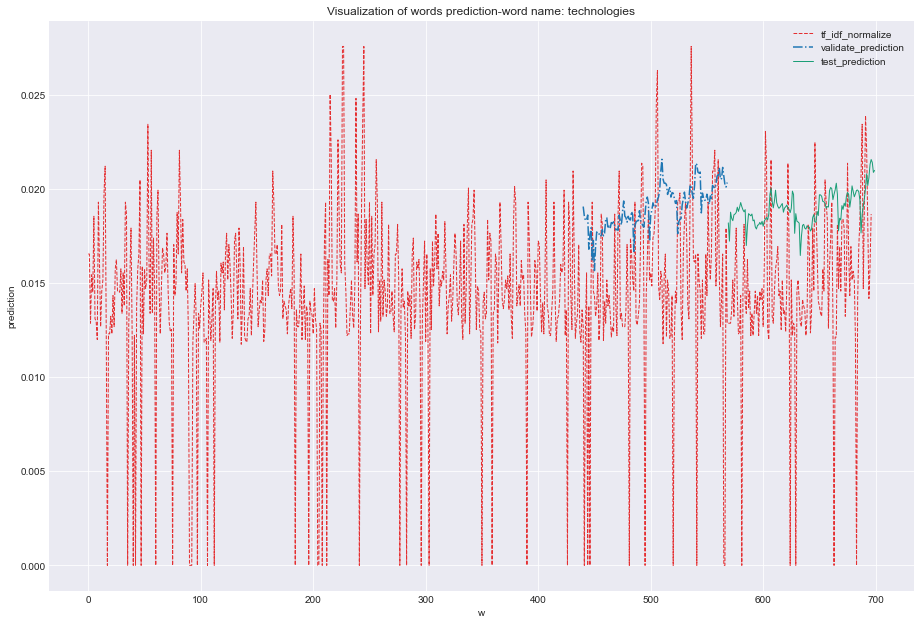

In [51]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

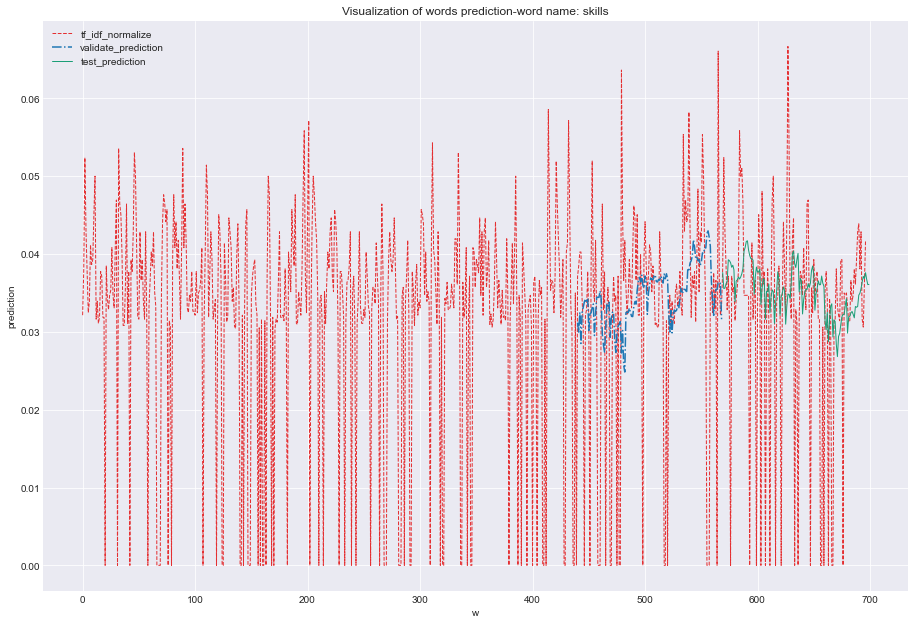

In [52]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

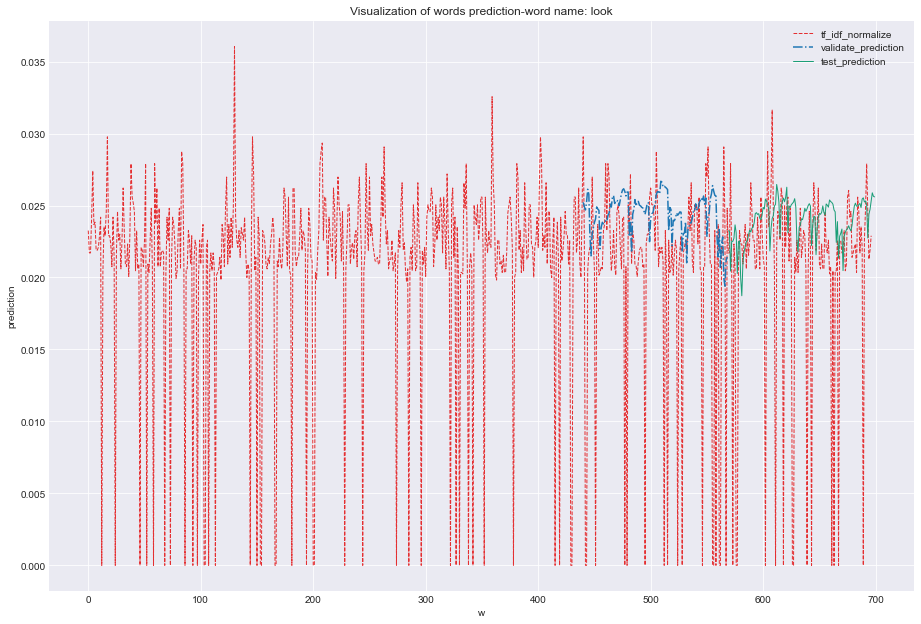

In [53]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MAE

In [54]:
name_model='model_bidirectional_cluster/MAE_bidirectional_kmeans_cluster_v2_model'
name_history='history_bidirectional_cluster/MAE_bidirectional_kmeans_cluster_v2_history'

In [55]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanAbsoluteError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [56]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


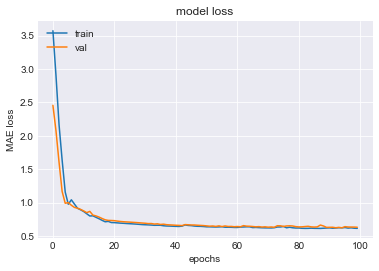

In [57]:
model_obj.model_loss(load_history,'MAE')

In [58]:
# Get a test and valid prediction for a MAE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [59]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 9s 4ms/step - loss: 0.0731


0.07307063788175583

In [60]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.046941265], [0.030464469], [0.027067756], ...   
1  [[0.049386367], [0.041243106], [0.032676533], ...   
2  [[-0.004028829], [-0.0044466127], [-0.00465691...   
3  [[0.020631624], [0.018753244], [0.017507313], ...   
4  [[-0.0037305076], [-0.003472561], [-0.00302404...   

                                     test_prediction  
0  [[-0.006982321], [-0.0068543646], [-0.00664130...  
1  [[0.017168475], [0.026611647], [0.03721872], [...  
2  [[-0.00383229], [-0.0050318707], [-0.006115081...  
3  [[-0.00414137], [0.032191984], [0.012361182], ...  
4  [[0.008370383], [0.005886091], [0.0037191343],...

### Visualization of words prediction - MAE loss

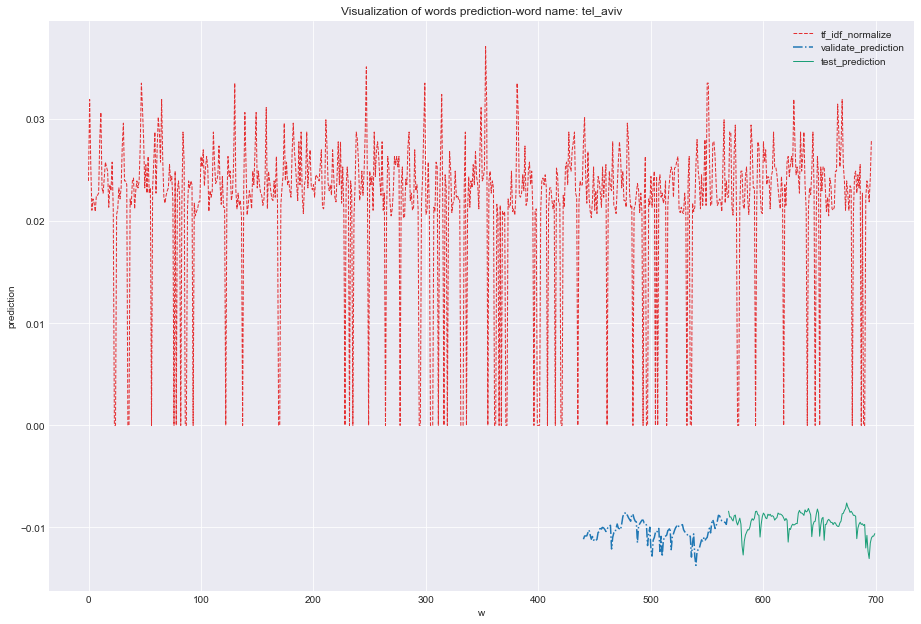

In [61]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

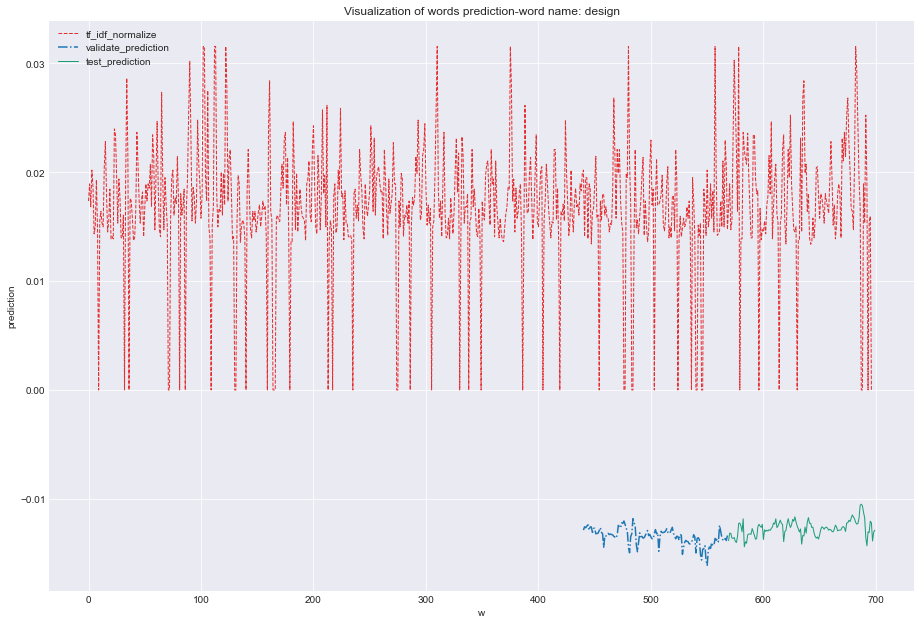

In [62]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

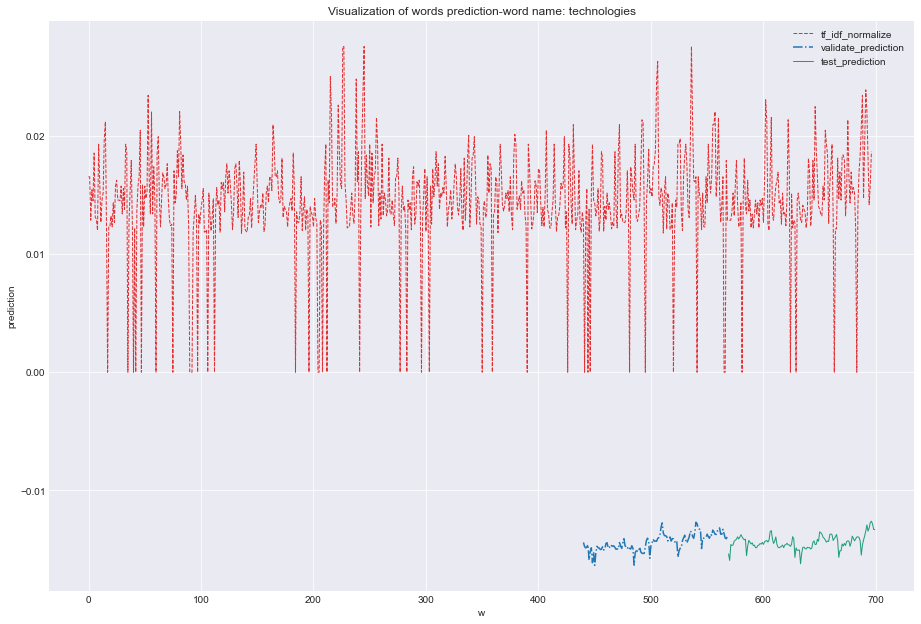

In [63]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

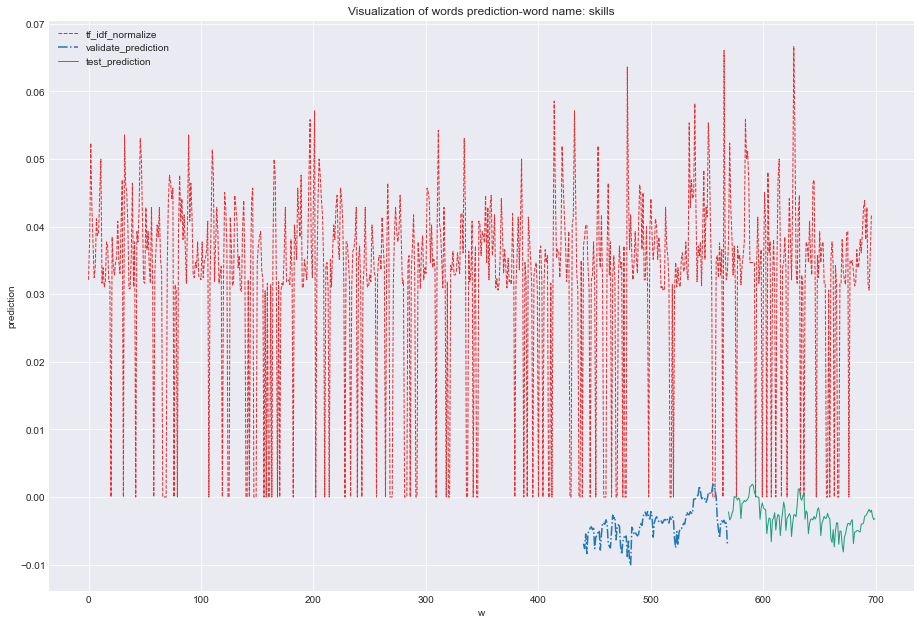

In [64]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

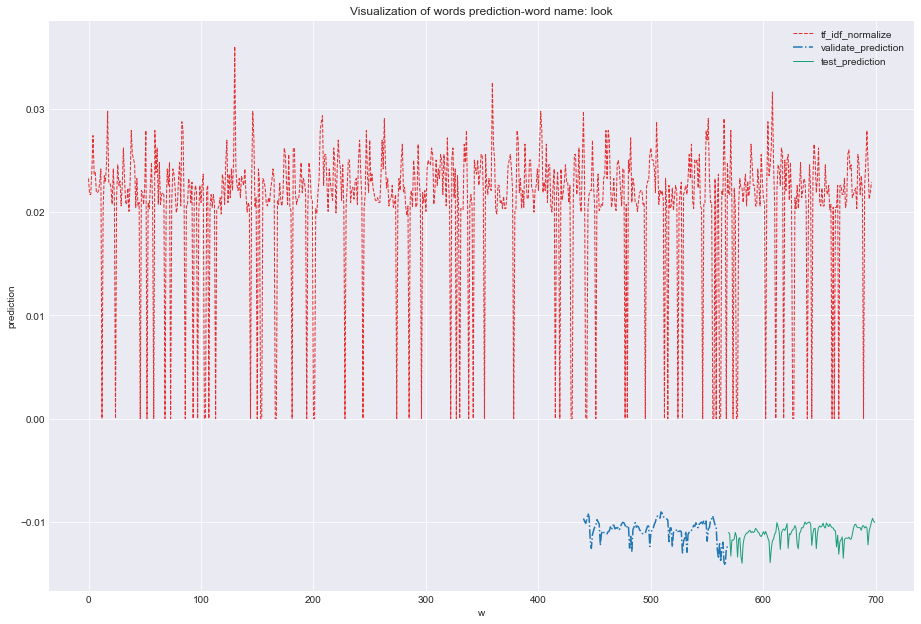

In [65]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MSE

In [66]:
name_model='model_bidirectional_cluster/MSE_bidirectional_kmeans_cluster_v2_model'
name_history='history_bidirectional_cluster/MSE_bidirectional_kmeans_cluster_v2_history'

In [67]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanSquaredError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [68]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


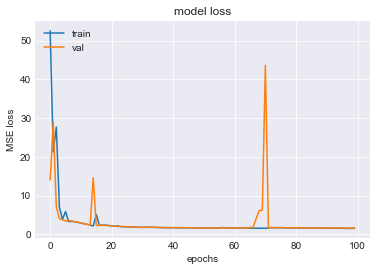

In [69]:
model_obj.model_loss(load_history,'MSE')

In [70]:
# Get a test and valid prediction for a MSE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [71]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 10s 5ms/step - loss: 0.0123


0.012309401296079159

In [72]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  kmeans_clusters  \
0             109.704459                0   
1             107.480757                0   
2             104.355574                0   
3              90.295322                0   
4              94.068587                0   

                                 validate_prediction  \
0  [[0.10863512], [0.0925315], [0.0866995], [0.08...   
1  [[0.13404708], [0.12279307], [0.108770296], [0...   
2  [[0.03310275], [0.030828798], [0.028821448], [...   
3  [[0.06628548], [0.062038764], [0.05894188], [0...   
4  [[0.017065415], [0.01608635], [0.015401104], [...   

                                     test_prediction  
0  [[0.0160523], [0.015642041], [0.01555212], [0....  
1  [[0.042787656], [0.06199327], [0.08160219], [0...  
2  [[0.028382646], [0.025861667], [0.023597213], ...  
3  [[0.016186306], [0.06285808], [0.04645492], [0...  
4  [[0.052187257], [0.048088387], [0.044476397], ...

### Visualization of words prediction - MSE  loss

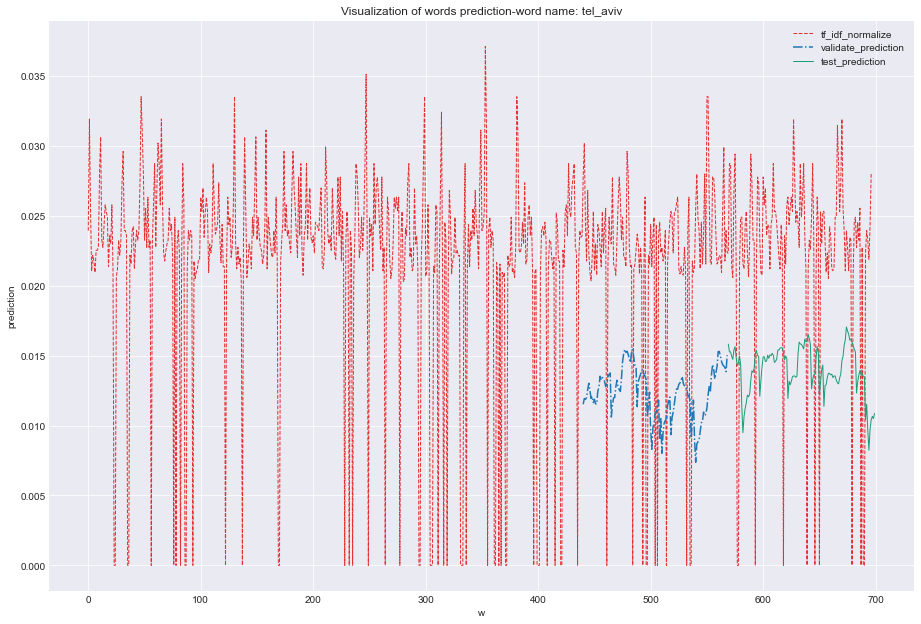

In [73]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

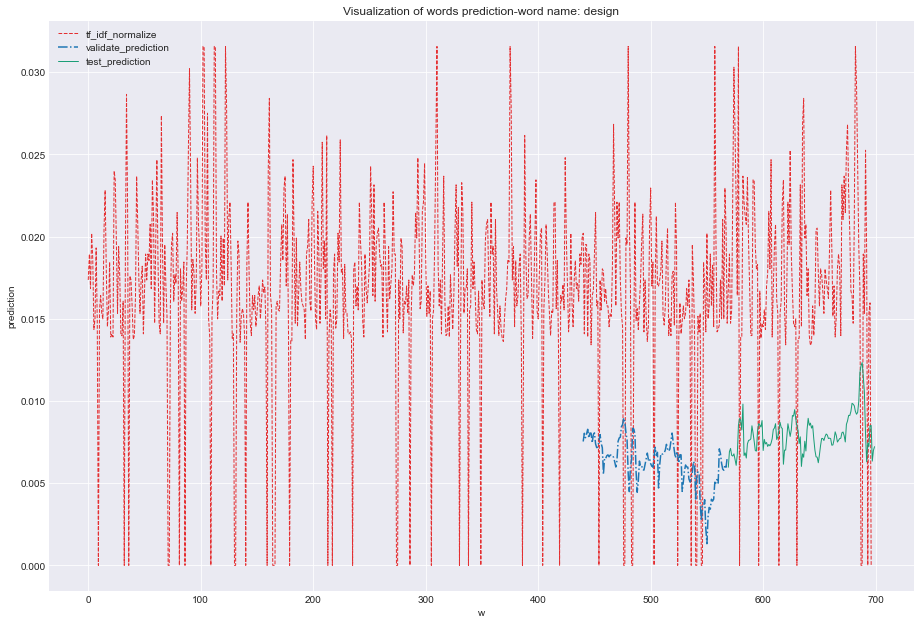

In [74]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

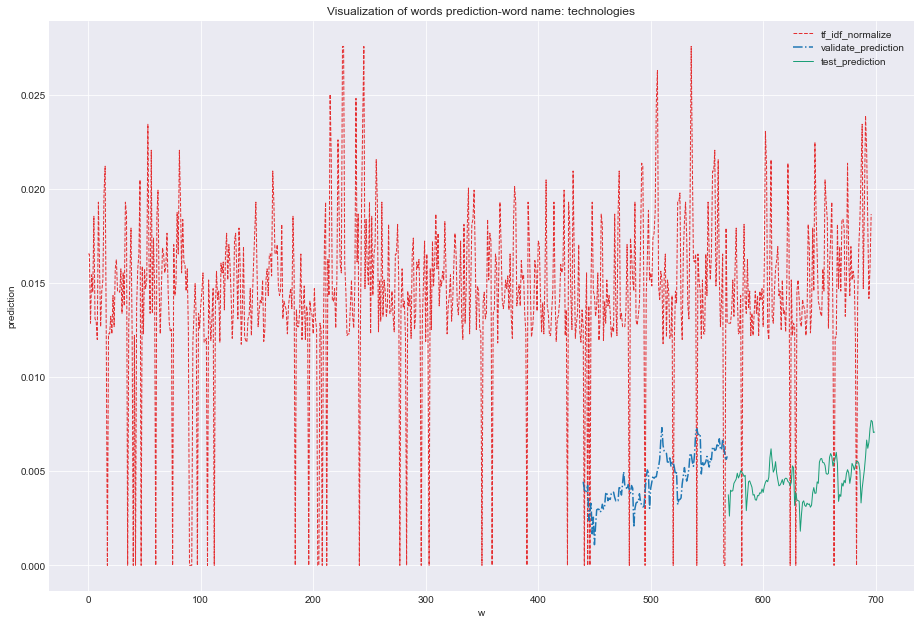

In [75]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

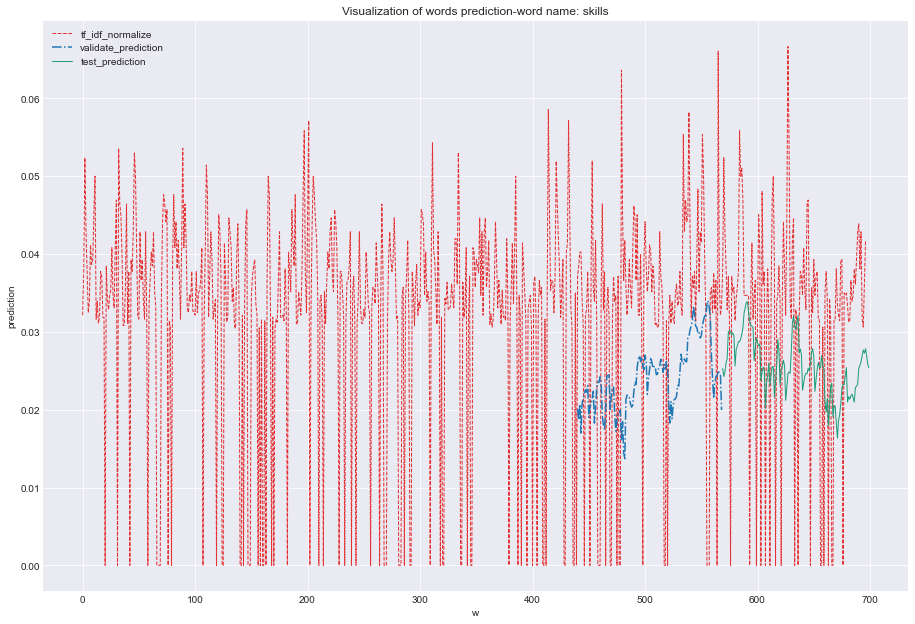

In [76]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

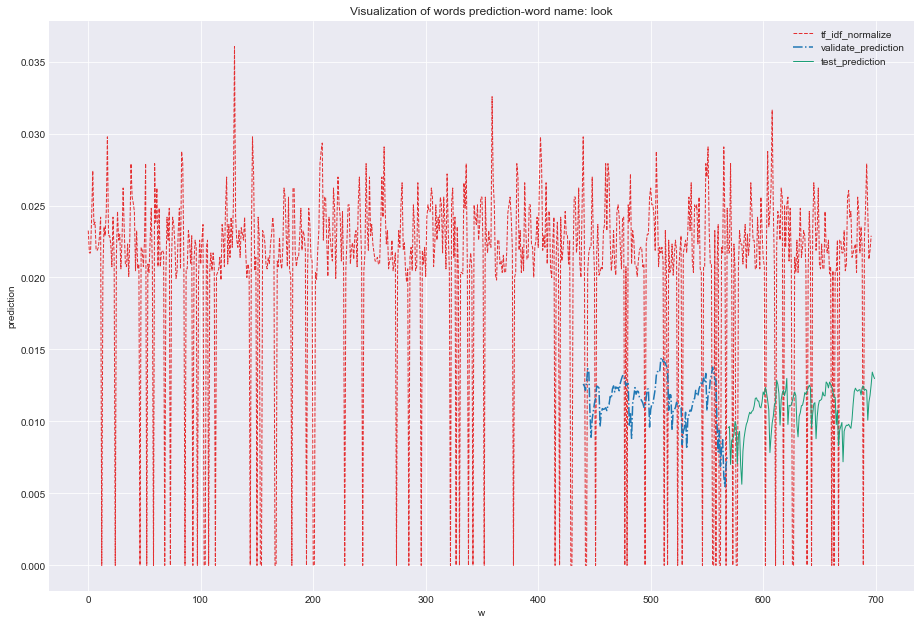

In [77]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)